In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras


print(tf.test.is_gpu_available())
print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

True
2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.18.5
pandas 1.0.5
sklearn 0.23.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
x_train_all.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train_all.shape

(60000,)

In [7]:
x_valid,x_train =  x_train_all[:5000],x_train_all[5000:]
y_valid,y_train =  y_train_all[:5000],y_train_all[5000:]

In [8]:
x_train.shape

(55000, 28, 28)

In [9]:
np.max(x_train),np.min(x_train)

(255, 0)

In [10]:
# 对数据做标准化
# x = (x - u)/std (u:均值,std:方差)

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

# 需要一个二维矩阵 x_train是三维的，要转成二维矩阵，再转成三维
# [None,28,28] ---> [None,784]
x_train_sacled = scalar.fit_transform(
x_train.astype(np.float32).reshape(-1,1)
).reshape(-1,28,28)

x_valid_scaled = scalar.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

x_test_scaled = scalar.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [11]:
np.max(x_train_sacled),np.min(x_train_sacled)

(2.0231433, -0.8105136)

In [12]:

# 顺序模型 Sequential 模型结构： 层（layers）的线性堆栈。简单来说，它是一个简单的线性结构，没有多余分支，是多个网络层的堆叠
# tf.keras.models.Sequential()
"""
model =keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
# 全连接层， activation激活函数
model.add(keras.layers.Dense(300,activation='relu'))

model.add(keras.layers.Dense(100,activation='relu'))

model.add(keras.layers.Dense(10,activation="softmax"))
"""

# relu: y = max(0, x)
# softmax:将向量变成概率分布,x=[x1,x2,x3]
#  y = [e^x1/sum,e^x2/sum,e^x3/sum],sum = e^x1 + e^x2 + e^x3

model =keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation="softmax")
    
])


#  计算交叉熵损失
# reasone for sparse: y是一个单纯的数字(index),要变成one_hot编码
# 如果y已经是一个向量了就用categorical_crossentropy
# loss：损失函数 交叉熵损失
# optmizer：优化器 sgd 越来越小
# metrics:验证指标
model.compile(loss="sparse_categorical_crossentropy",optmizer = "sgd",metrics=["accuracy"])



In [13]:
history = model.fit(x_train_sacled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 134us/sample - loss: 0.4858 - accuracy: 0.8252 - val_loss: 0.4142 - val_accuracy: 0.8538
Epoch 2/10
55000/55000 [==============================] - 6s 118us/sample - loss: 0.3876 - accuracy: 0.8635 - val_loss: 0.3965 - val_accuracy: 0.8732
Epoch 3/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.3656 - accuracy: 0.8736 - val_loss: 0.4021 - val_accuracy: 0.8652
Epoch 4/10
55000/55000 [==============================] - 8s 137us/sample - loss: 0.3533 - accuracy: 0.8785 - val_loss: 0.4003 - val_accuracy: 0.8832
Epoch 5/10
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3427 - accuracy: 0.8825 - val_loss: 0.4293 - val_accuracy: 0.8838
Epoch 6/10
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3337 - accuracy: 0.8878 - val_loss: 0.4635 - val_accuracy: 0.8788
Epoch 7/10
55000/55000 [===========================

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

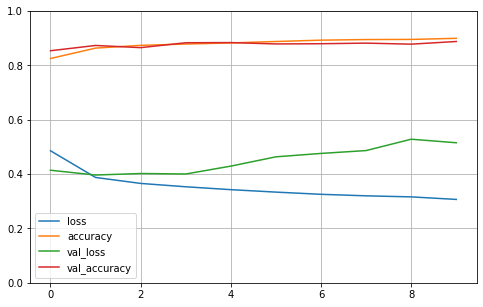

In [15]:
plot_learning_curves(history)

In [16]:
model.evaluate(x_test_scaled,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5119696808934212, 0.8746]